# Project 1 - Data Engineering
## 2 Data Exploration and Analysis
This notebook is for the implementation of task "2 Data Exploration and Analysis", as listed in the **Project Instructions**.

<div class="alert alert-success">
<b>Overview:</b><br>
Data Exploration and Analysis consists of the following parts worth 70 points:
<ul>
    <li><b>E1 - Obtain and Scrub</b> (15 points)</li>
    <li><b>E2 - Exploratory data analysis (EDA) </b>(20 points)</li>
    <li><b>E3 - Formulate hypotheses </b>(25 points)</li>
    <li><b>Follow the guidelines for Data Exploration and Analysis below </b>(10 points)</li>
</ul></div>

<div class="alert alert-success">
<b>Guidelines for Data Exploration and Analysis:</b><br>
    <ol>
        <li>Use a single Jupyer notebook for your project.</li>
        <li>Use only Python-code for your project.</li>
        <li>The use of automatic and semi-automatic data analyis tools is not allowed (e. g., PandasGUI, D-Tale, Mito, etc.). Only use packages we used in the coded lectures.</li>
        <li>Export your environment for submission as 'prj01-environment.txt'.</li>
        <li>Upload your resulting work as a zip file containing only a single jupyter notebook and required files to run the notebook. All cell outputs and <b>figures must display in jupyter lab</b>. (Test this, in particular when you use another environment like VS Code.)</li>
        <li>All code cells in your notebook must be runnable without errors or warnings (e. g., deprecated functions). Each error/warning subtracts -2 points (up to the full 10 points for following the  guidelines).</li>
        <li>Use only relative paths in your project.</li>
        <li>Avoid (excessive) code duplication.</li>
        <li>Avoid loops iterating over pandas objects (Series, DataFrames). Explicitly justify each exception via a comment. </li>
        <li>All coded steps in your analysis must be commented.</li>
        <li>Keep your code as well as outputs short, precise and readable. Each long or unnecessary output subtracts -2 points (up to the full 10 points for following the project guidelines).</li>
    </ol>
    <b>Late submissions are not accepted and earn you 0 points on the python project. </b>
</div>

Explicitly list which notebook toolset was used (jupyter lab/jupyter notebook/VS Code/etc.) 

**here**: MY_TOOL, MY_BROWSER

Explicitly and clearly state the chosen dataset number and title:
### Health DG 
## 99. Alzheimer's Disease and Healthy Aging Data


## E1 - Obtain and Scrub

### Obtain
Download the dataset and understand both: 
- format: wide vs. long, separaters, decimal points, encoding, etc., and 
- content: what variables are in the columns, what is their meaning?
To this end, identify and download metadata such as headers, category listings, explanatory reports, etc.
### Scrub
The aim of scrub is to create a clean version of the data for further analysis. 
- Load the dataset and take care of dtypes (dates, numbers, categories, etc.). Justify why you don't load/use specific columns.
- Check for footnotes or any other notifications on special cell content, such as time series breaks. Follow up that information, and document your decision how to deal with it. Remember: The homework 4 contained such info in the cell "76.1 b". The metadata defines what that "b" stands for.
  
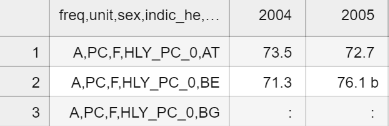
- Choose an appropriate (Multi-)Index.
- Identify:
    1. missing values and get row and column overviews. Use graphical and/or numeric approaches. Once identified, handle missing values according to column type, time series property and data set size.
    2. duplicates (justify the used column subset). Remove duplicates - if any - and inspect what you removed.
- Transform to shape (tidy vs. wide) best suited for further analysis.
- Export the clean data to a file for inspection with an external data browser (e.g., MS Excel).
- Provide an overview of the clean dataset:
    1. show the dtypes
    2. quantitative column descriptions: 
        1. categorical columns: number of unique values, counts 
        2. numeric columns: range and median

In [137]:
# Load necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Set display options to better analize the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Load dataset
data = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')

/tmp/ipykernel_8161/3156040828.py:7: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')


In [5]:
# Check Dtypes
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       250937 non-null  object 
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Response                    0 non-null       float64
 10  Data_Value_Unit             250937 non-null  object 
 11  DataValueTypeID             250937 non-null  object 
 12  Data_Value_Type             250937 non-null  object 
 13  Data_Value    

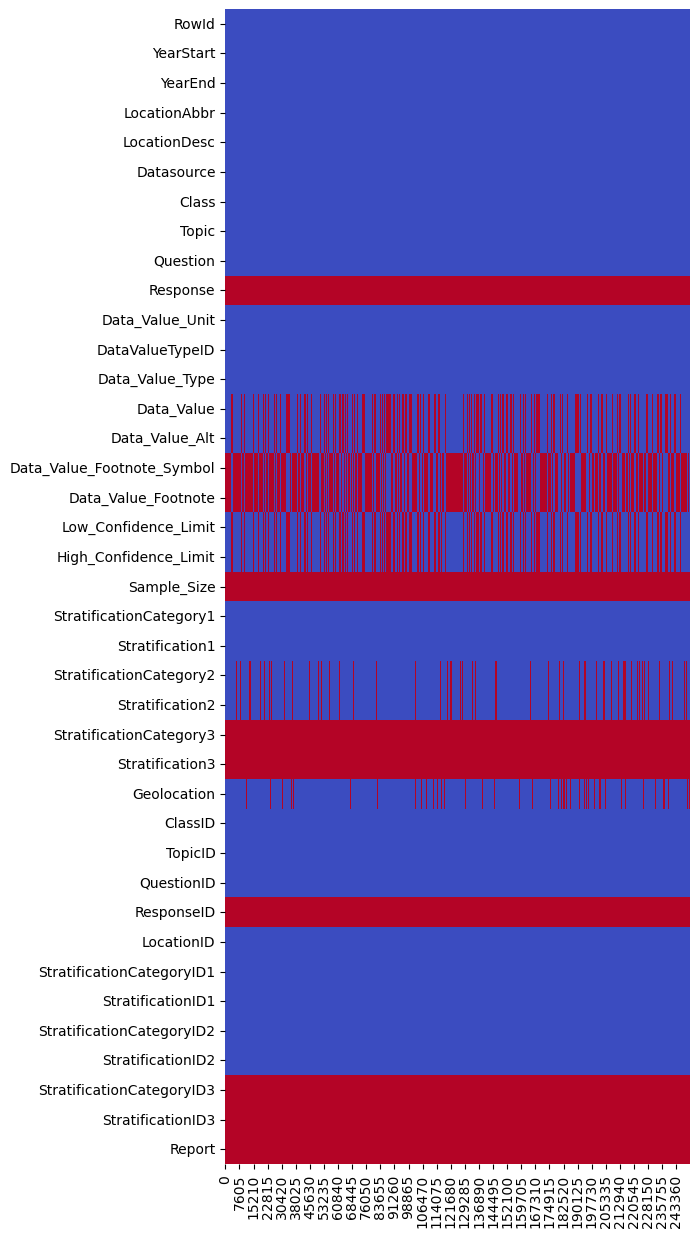

In [4]:

# data_description = data.describe(include='all')
# data.isnull().sum()

# Visualize missing values in heatmap
plt.figure(figsize=(6, 15))
sns.heatmap(data.T.isnull(), cbar=False, cmap='coolwarm')
plt.show()

In [6]:
# data.select_dtypes(include=['float64', 'int64']).columns
data['Datasource'].unique()

array(['BRFSS'], dtype=object)

In [7]:
# Droping columns where all rows have the value null
columns_to_drop = [ 
            'Datasource', # Droping because all rows have the same value (BRFSS)
            'Response', 
            'Sample_Size', 
            'StratificationCategory3', 
            'Stratification3',
            'ResponseID',
            'StratificationCategoryID3',
            'StratificationID3',
            'Report',
            'Data_Value_Footnote_Symbol',
            'Data_Value_Footnote' #,
            # 'Geolocation'
        ]

data_cleaned = data.drop(columns=columns_to_drop)

# Converting 'Low_Confidence_Limit' and 'High_Confidence_Limit' to numeric (if possible)
data_cleaned['Low_Confidence_Limit'] = pd.to_numeric(data_cleaned['Low_Confidence_Limit'], errors='coerce').astype(float)
data_cleaned['High_Confidence_Limit'] = pd.to_numeric(data_cleaned['High_Confidence_Limit'], errors='coerce').astype(float)

# Extracting latitude and longitude from the 'Geolocation' column
data_cleaned[['Longitude', 'Latitude']] = data_cleaned['Geolocation'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').astype(float)

string_cols = data_cleaned.select_dtypes(include=['object']).columns
for col in string_cols:
    data_cleaned[col] = data_cleaned[col].astype('string').str.strip()

# Sort the data by StartYear
data_cleaned = data_cleaned.sort_values(by='YearStart')

# Drop Geolocation as it's no longer needed
data_cleaned = data_cleaned.drop(columns='Geolocation')

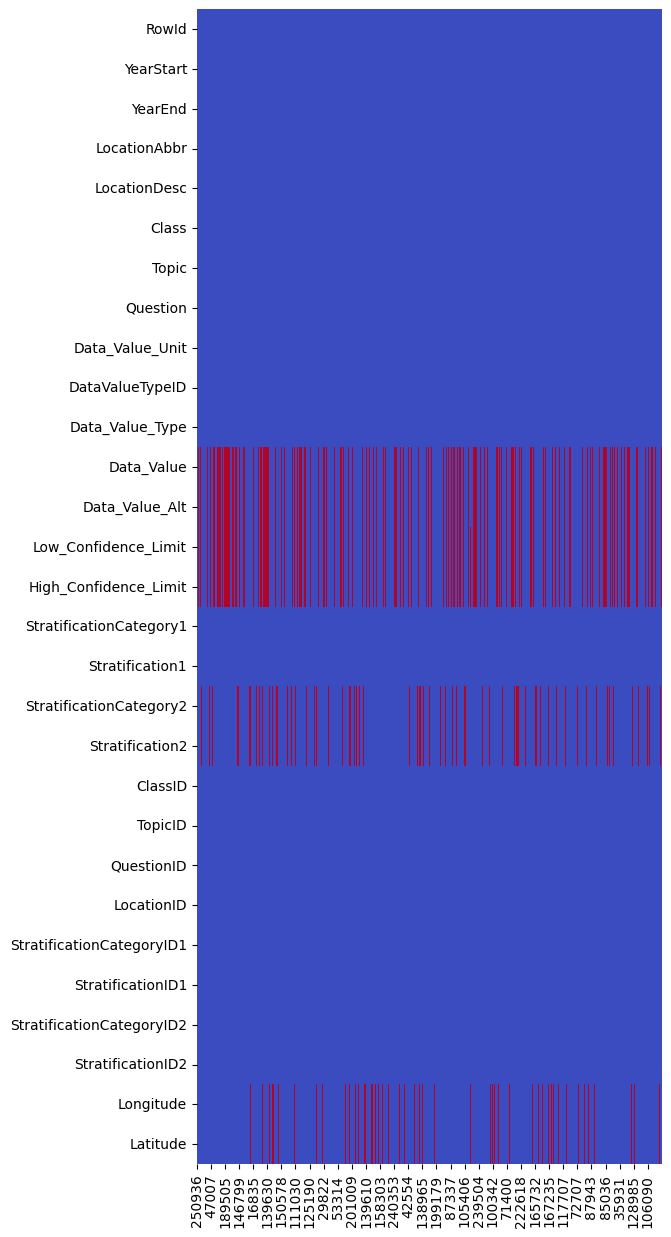

In [8]:
# Check heatmap after cleanup
plt.figure(figsize=(6, 15))
sns.heatmap(data_cleaned.T.isnull(), cbar=False, cmap='coolwarm')
plt.show()

In [7]:
# Check Dtypes
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RowId                      250937 non-null  string 
 1   YearStart                  250937 non-null  int64  
 2   YearEnd                    250937 non-null  int64  
 3   LocationAbbr               250937 non-null  string 
 4   LocationDesc               250937 non-null  string 
 5   Class                      250937 non-null  string 
 6   Topic                      250937 non-null  string 
 7   Question                   250937 non-null  string 
 8   Data_Value_Unit            250937 non-null  string 
 9   DataValueTypeID            250937 non-null  string 
 10  Data_Value_Type            250937 non-null  string 
 11  Data_Value                 169302 non-null  float64
 12  Data_Value_Alt             169302 non-null  float64
 13  Low_Confidence_Limit       16

In [9]:
data_cleaned['Data_Value_Unit'].unique()
# data_cleaned['DataValueTypeID'].unique()
# data_cleaned['Data_Value_Type'].unique()
# data_cleaned['Data_Value'].unique()


<StringArray>
['%', 'Number']
Length: 2, dtype: string

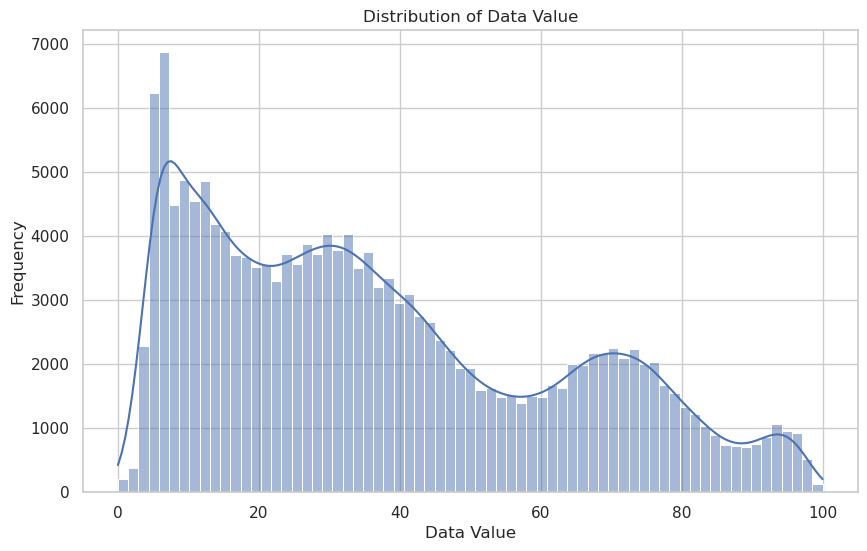

In [61]:
# Statustical Numerical description

sns.set(style="whitegrid")
data_subset = data_cleaned.sample(n=10000, random_state=1)

# Plot 1: Distribution of 'Data_Value' (after handling missing values)
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Data_Value'], kde=True)
plt.title('Distribution of Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

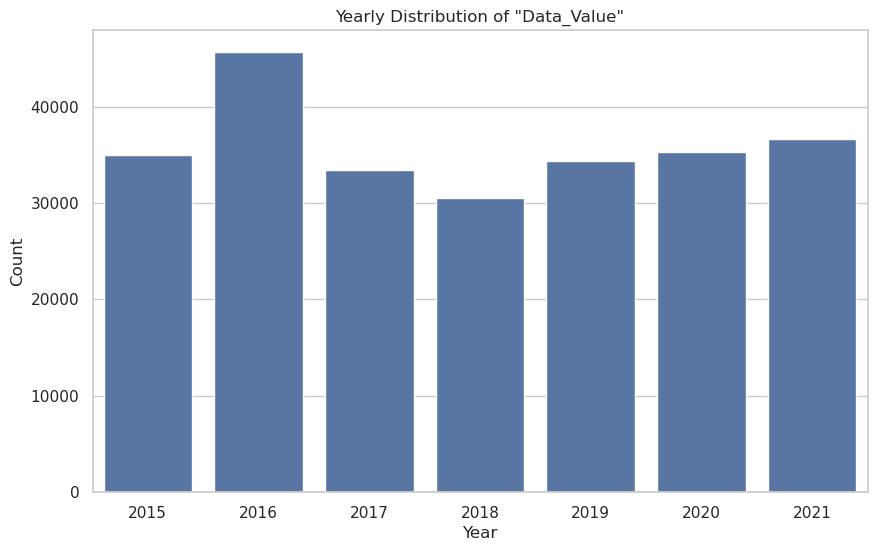

In [77]:
# Plot 2: Yearly Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='YearStart', data=data_cleaned, color='#4c72b0')
# plt.bar(data_subset['YearStart'], data_subset['Data_Value'])
plt.title('Yearly Distribution of "Data_Value"')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

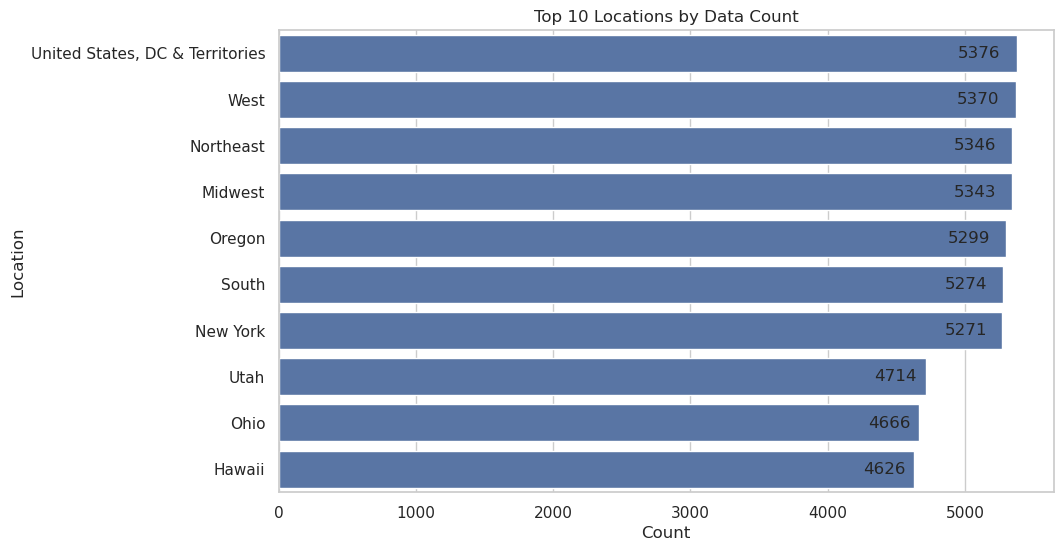

In [81]:
# # Plot 3: Top 10 Locations by Data Count
top_locations = data_cleaned['LocationDesc'].value_counts().head(10).sort_values(ascending=False)
# top_locations = data_subset['LocationDesc'].value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_locations.values, y=top_locations.index, color='#4c72b0')

for b in ax.patches:
  width = b.get_width()
  ax.text(width - (width*0.08), b.get_y() + b.get_height() / 2, int(width), ha='left', va='center')

plt.title('Top 10 Locations by Data Count')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

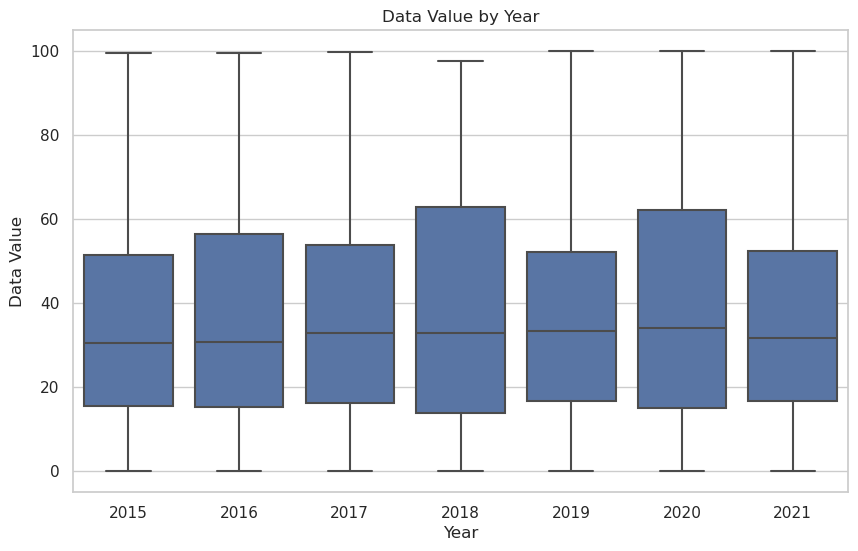

In [83]:
# # Plot 4: Boxplot of Data Value by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearStart', y='Data_Value', data=data_cleaned, color='#4c72b0')
# sns.boxplot(x='YearStart', y='Data_Value', data=data_subset, color='#4c72b0')
plt.title('Data Value by Year')
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.show()

# gdf = gpd.GeoDataFrame(data_subset_geo, geometry=gpd.points_from_xy(data_subset_geo.Longitude, data_subset_geo.Latitude))
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# fig, ax = plt.subplots(figsize=(15, 10))
# world.plot(ax=ax, color='lightgrey')
# gdf.plot(ax=ax, color='blue', markersize=5)
# plt.show()

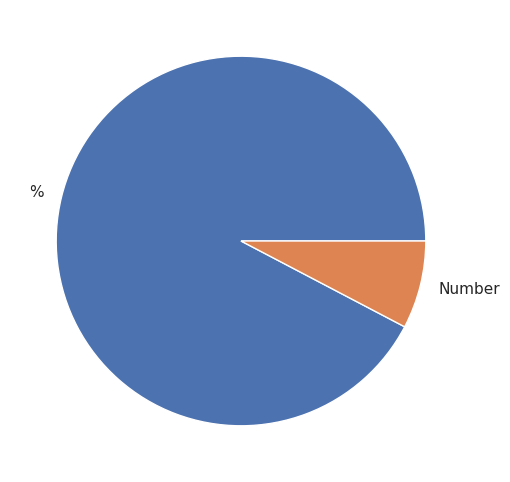

In [66]:
# Plot 5: Data_value unit
unit_counts = data_cleaned['Data_Value_Unit'].value_counts() 

plt.figure(figsize=(6,6))
plt.pie(unit_counts, labels=unit_counts.index)
plt.show()

## E2 - Exploratory data analysis (EDA)
Use the clean dataset and to understand and explore the relationships in the data (numerical, visual, statistical). This includes at least but is not limited to:
- A comprehensive textual description of meaning for relevant fields in the dataset
- Statistical/numerical descriptions and visualization techniques we learned in the course inluding correlations, distributions and groupings of variing degrees.
- Checks for data quality, e. g., completeness, plausibility, outliers
- Handling any identified problems with the data
- If necessary, use additional data wrangling in line with your EDA and only keep what's necessary for the following steps of your analysis with appropriate data granularity and form ("tidy data")

Don't:
- test/prove hypotheses here. EDA should only motivate hypotheses. 

Advanced/bonus:
- Depending on your hypothesis you may want to join external data (e.g., merge external highest education level to existing vaccination data) for additional insights.

Explain all steps taken and your thinking why you deem them necessary.

# Textual description of Fields
The cleaned dataset consists of 29 columns which contain information on various surveys regarding public health in the US.
of these, 20 are categorical and 9 are numeric. Specifically, 3 of the numeric variables are integers.
These are the most important fields in the dataset, in order of appearance in the data, as well as their data type:
 - *RowId* (string): A unique Identifier for each column. The ID contains information on some of the columns in the Row. Explicitly, it is formatted like this: *Datasource*\~*YearStart*\~*YearEnd*\~*LocationID*\~*QuestionID*\~*TopicID*\~*StratificationCategoryID1*\~*StratificationCategoryID2*.
 - *YearStart* and *YearEnd* (integers): Years when the survey started and ended, respectively.
 - *LocationAbbr* (string): an Abbreviation of the Location where the survey took place. for single states, it is the ISO-Code of the state, for regions an abbreviated form of the area (for example "NRE" for "Northeast").
 - *LocationDesc* (string): Full name of the state or region where the survey took place.
 - *Class* (string): Focus of the specific survey, eg. "Overall Health" or "Screenings and Vaccines".
 - *Topic* (string): A short description of the Topic of the survey.
 - *Question* (string): Question asked in the survey.
 - *Data_Value_Type* (string): Type of the *Data_Value*, e.g. "Mean" or "Percentage".
 - *Data_Value* (float): The actual Value of the survey result.
 - *Low_Confidence_Limit* and *High_Confidence_Limit* (floats): the lower and upper bounds of the confidence interval, respectively.
 - *StratificationCategory1* and *StratificationCategory2* (strings): Categories by which the target population of the survey is selected
 - *Stratification1* and *Stratification2* (strings): Specific stratification groups selected for the survey
 - *Latitude* and *Longitude* (floats): Coordinates of the survey

in Addition, there are *\~ID* columns which abbreviate the values into identifiers for the following columns: *Data_Value_Type*, *Class*, *Topic*, *Question*, *Location*, *StratificationCategory1*, *Stratification1*, *StratificationCategory2* and *Stratification2*





In [152]:
data_cleaned['Stratification2'].unique()

<StringArray>
[                'Hispanic',   'Asian/Pacific Islander',
                     'Male',      'Black, non-Hispanic',
                       <NA>, 'Native Am/Alaskan Native',
      'White, non-Hispanic',                   'Female']
Length: 8, dtype: string

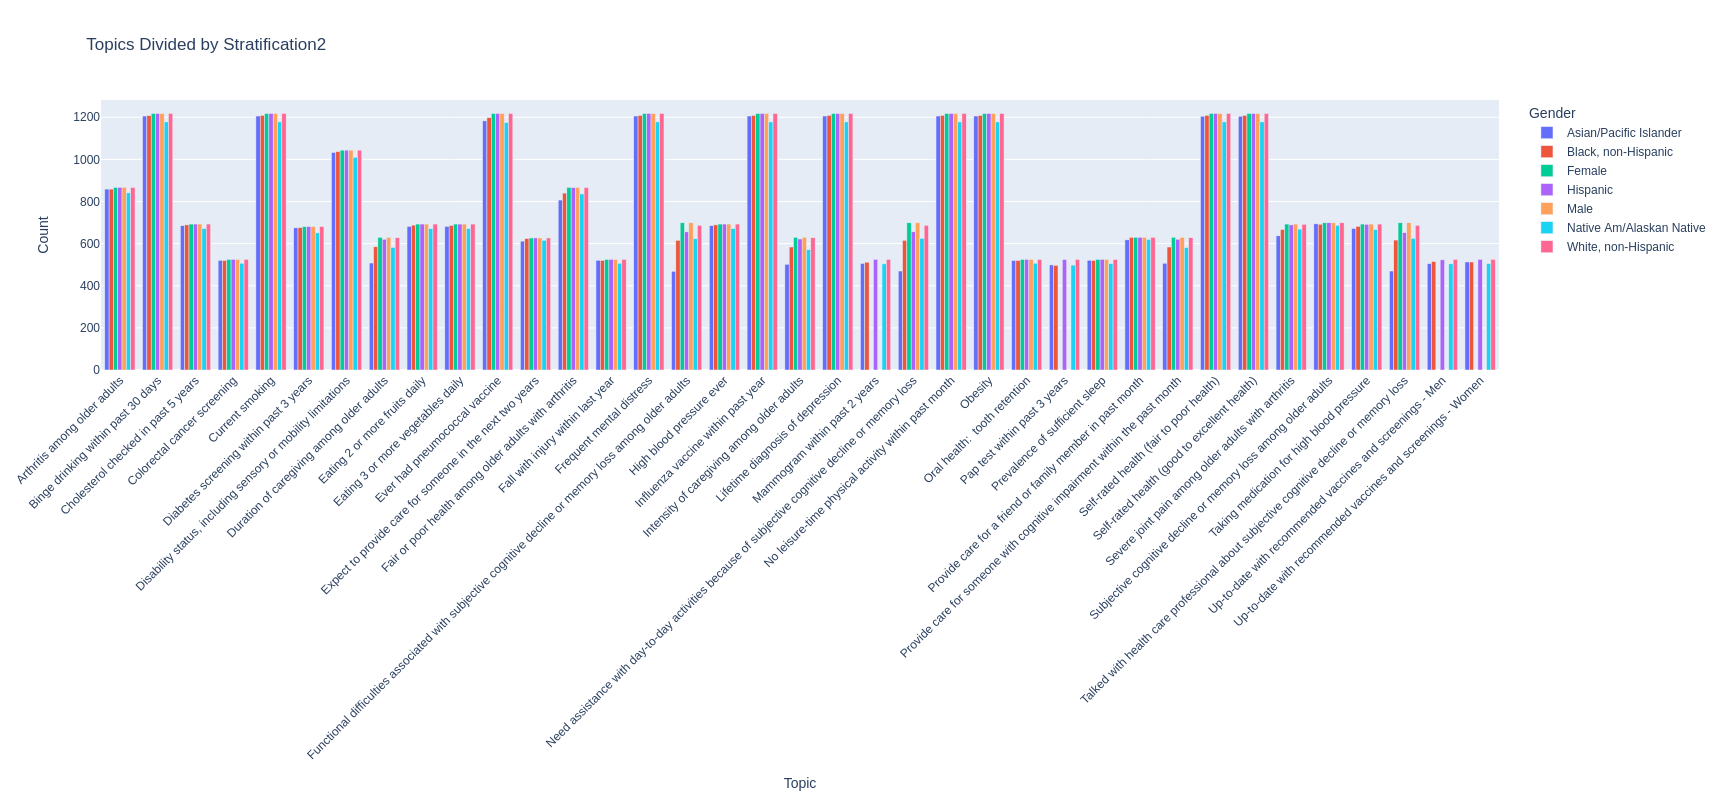

In [177]:
# Interactice bar chart for analizing topics by Stratification2:
#   'Hispanic'
#   'Asian/Pacific Islander'
#   'Male'
#   'Black, non-Hispanic'
#   'Native Am/Alaskan Native'
#   'White, non-Hispanic'                   
#   'Female'

data_cleaned_percent = data_cleaned[data_cleaned['Data_Value_Unit'] == '%'] 
topics_by_stratification2 = data_cleaned_percent.groupby(['Topic', 'Stratification2']).size().unstack()

topics_by_stratification2_long = topics_by_stratification2.reset_index().melt(id_vars='Topic', var_name='Gender', value_name='Count')

# Create the bar chart
fig = px.bar(topics_by_stratification2_long, x='Topic', y='Count', color='Gender', 
             title='Topics Divided by Stratification2',
             labels={'Count':'Count', 'Topic':'Topic'},
             barmode='group')

# Update layout
fig.update_layout(xaxis_title='Topic',
                  yaxis_title='Count',
                  legend_title='Gender',
                  xaxis_tickangle=-45,
                  width=1300,
                  height=800
                  )

# Show the interactive plot
fig.show()

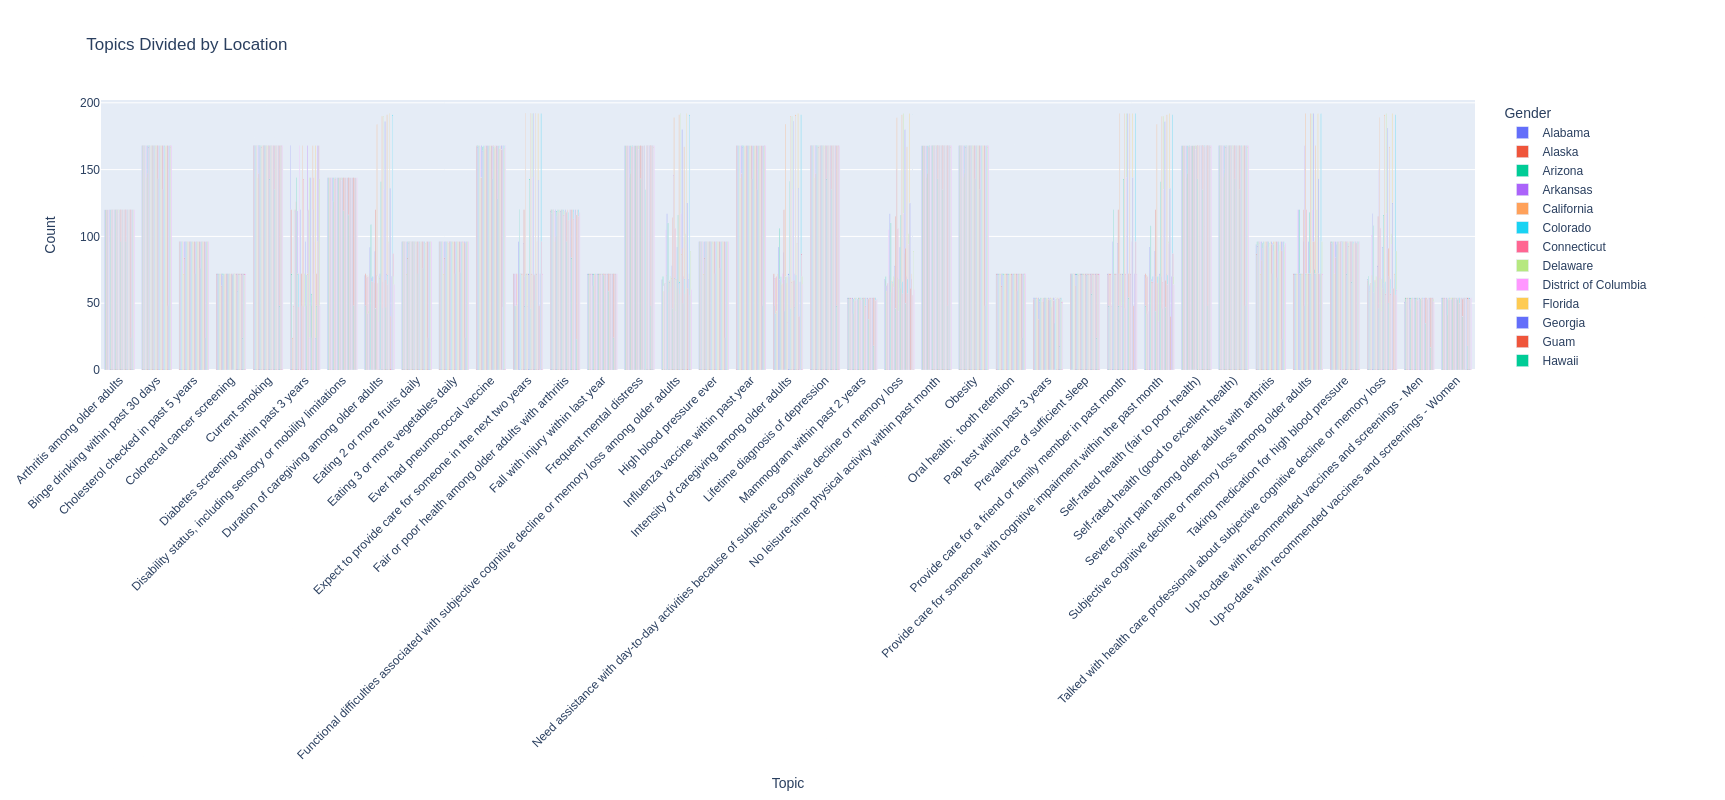

In [178]:
# Interactice bar chart for analizing topics by LocationDesc:

topics_by_location = data_cleaned_percent.groupby(['Topic', 'LocationDesc']).size().unstack()
topics_by_location_long = topics_by_location.reset_index().melt(id_vars='Topic', var_name='Location', value_name='Count')

# Create the bar chart
fig = px.bar(topics_by_location_long, x='Topic', y='Count', color='Location', 
             title='Topics Divided by Location',
             labels={'Count':'Count', 'Topic':'Topic'},
             barmode='group')

# Update layout
fig.update_layout(xaxis_title='Topic',
                  yaxis_title='Count',
                  legend_title='Gender',
                  xaxis_tickangle=-45,
                  width=1300,
                  height=800
                  )

# Show the interactive plot
fig.show()

In [170]:
# Analizing which locations have the lowest and highest count by topic
topic_count_min = topics_by_location_long['Count'].min()
topic_count_max = topics_by_location_long['Count'].max()

topics_by_location_long[topics_by_location_long['Count'] == topic_count_min]
topics_by_location_long[topics_by_location_long['Location'] == 'Virgin Islands']

# topics_by_location_long[topics_by_location_long['Count'] == topic_count_max]

,Topic,Location,Count
2028,Arthritis among older adults,Virgin Islands,24.0
2029,Binge drinking within past 30 days,Virgin Islands,48.0
2030,Cholesterol checked in past 5 years,Virgin Islands,24.0
2031,Colorectal cancer screening,Virgin Islands,24.0
2032,Current smoking,Virgin Islands,48.0
2033,Diabetes screening within past 3 years,Virgin Islands,48.0
2034,"Disability status, including sensory or mobility limitations",Virgin Islands,48.0
2035,Duration of caregiving among older adults,Virgin Islands,NaN
2036,Eating 2 or more fruits daily,Virgin Islands,24.0
2037,Eating 3 or more vegetables daily,Virgin Islands,24.0


## E3 - Formulate hypotheses

*Note: Read this section entirely and understand it - every group member.*

A hypothesis is an idea or explanation for something that is based on known facts but has not yet been proved. A hypothesis is a compact, concise statement, such as: "Individuals with higher income have (on average) more offspring.", that will be answered based on facts (the data). https://gradcoach.com/what-is-a-research-hypothesis-or-scientific-hypothesis/

Formulate 5 non-trivial hypotheses, 1 per group member, and regard the following criteria: 
- State the hypothesis explicitly in concise language. 
- The hypothesis must be **motivated** by either **EDA results** or **literature** (citation in the report needed).
- The hypothesis must refer to **endpoints** that are **testable**. Specifically, the endpoint must be derived from the data.
- Think of real-life use cases/consequences of your results (textual description). 
- For each hypothesis explain all executed steps. 
- In case of extreme or implausible results check the validity of your data.
- For each hypothesis export the artifacts (figures, tables, etc.) required for the report.
- If you decide to use a statistical test, use it properly. In particular, check the validity and comparability of the samples.

Do not:
- State nebulous, vague hypotheses. These don't contain endpoints and are unclear to test (i.e., answer).
- Use post-hoc hypotheses. Portraying an empirically inspired **post hoc hypothesis as a priori** violates the **falsification principle** crucial for hypothesis-driven (that is, confirmatory) empirical research. Falsification is severe scientific fraud.
- State trivial hypotheses (e.g., hypthesis 2: "Not Hypothesis 1").
- Answer based on "common knowledge".
- Try to **produce positively tested hypotheses**. If a well motivated hypothesis is negative, this is an important finding (see Simpson's Paradox). The value of a tested hypothesis lies in the information or learning it provides.

Example: The homework with Simpson's Paradox. The pooled overall comparison between the genders would be the EDA motivating the hypothesis: "At UC Berkeley the by-department admissions rate for females is lower than for males." It should be tested using samples of department admission rates for the 2 **groups** male and female. No steps of the test should be done in EDA (or a priory to stating the hypothesis). The groups should be compared graphically, e.g., via a stripplot overlayed with a boxplot. The figure should be labelled properly and exported for the report. A (paired) t-test *may* be used to test this hypothesis statistically. For different data (e.g., time series) different approaches may be required.


### E3-H1: "xxx"
Author: Group member 1


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### E3-H2: "xxx"
Author: Group member 2



### E3-H3: "xxx"
Author: Group member 3


### E3-H4: "xxx"
Author: Group member 4


### E3-H5: "xxx"
Author: Group member 5
